In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../iris.csv")

In [3]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
features = ['sepal.length',
            'sepal.width']
labels   = 'variety'

In [6]:
x = df[features]
y = df[labels]

In [7]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree = dtree.fit(x, y)

In [15]:
np.shape(x)

(150, 2)

[Text(0.5, 0.875, 'sepal.length <= 5.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.625, 'sepal.width <= 2.8\ngini = 0.237\nsamples = 52\nvalue = [45, 6, 1]'),
 Text(0.125, 0.375, 'sepal.length <= 4.7\ngini = 0.449\nsamples = 7\nvalue = [1, 5, 1]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.1875, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.375, 0.375, 'sepal.length <= 5.35\ngini = 0.043\nsamples = 45\nvalue = [44, 1, 0]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.4375, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [5, 1, 0]'),
 Text(0.75, 0.625, 'sepal.length <= 6.15\ngini = 0.546\nsamples = 98\nvalue = [5, 44, 49]'),
 Text(0.625, 0.375, 'sepal.width <= 3.45\ngini = 0.508\nsamples = 43\nvalue = [5, 28, 10]'),
 Text(0.5625, 0.125, 'gini = 0.388\nsamples = 38\nvalue = [0, 28, 10]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.875, 0.375, 'sepal.l

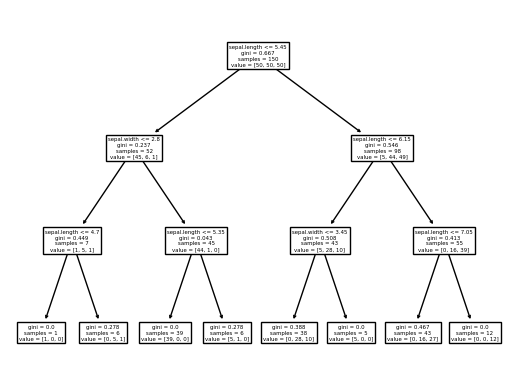

In [8]:
tree.plot_tree(dtree, feature_names=features)

# Overfitting


In [9]:
dfSet = df[ df['variety'] == "Setosa" ]
dfVir = df[ df['variety'] == "Virginica"] 
dfVer = df[ df['variety'] == "Versicolor"]

In [16]:
p = np.linspace(4.1, 8.2, 1000)
q = np.linspace(1.9, 4.6, 500)
pq = np.zeros((500000, 2))
for i in range(len(q)):
    for j in range(len(p)):
        pq[j + i*len(p)] = [p[j], q[i]] 
input = [[[pi, qi] for qi in q] for pi in p]
out = dtree.predict(pq)

c:\Users\Martin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
plt.figure(figsize=(9,8))
plt.grid(which='both', linestyle='dashdot')

plt.scatter(dfSet['sepal.length'], dfSet['sepal.width'], c='m')
plt.scatter(dfVer['sepal.length'], dfVer['sepal.width'], c='k')
plt.scatter(dfVir['sepal.length'], dfVir['sepal.width'], c='g')

plt.show()

In [22]:
d = {'Setosa' : 0,
     'Virginica' : 1,
     'Versicolor' : 2}

a = pd.Series(out).map(d)

In [25]:
a

0         0
1         0
2         0
3         0
4         0
         ..
499995    1
499996    1
499997    1
499998    1
499999    1
Length: 500000, dtype: int64

In [29]:
np.shape(np.transpose(pq)[0])

(500000,)

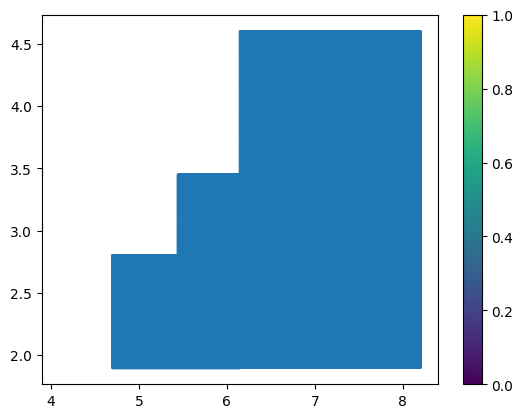

In [33]:
P, Q = np.meshgrid(p,q)
#plt.contourf(pq, a)

plt.scatter(np.transpose(pq)[0], np.transpose(pq)[1], np.meshgrid(a))
plt.colorbar()


In [17]:
np.shape(out)

(500000,)

In [ ]:
np.shape(np.reshape(out, ((500,))))